In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [4]:
# Creating dataframe
df = pd.read_csv("canada_per_capita_income.csv")
df.head(3)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


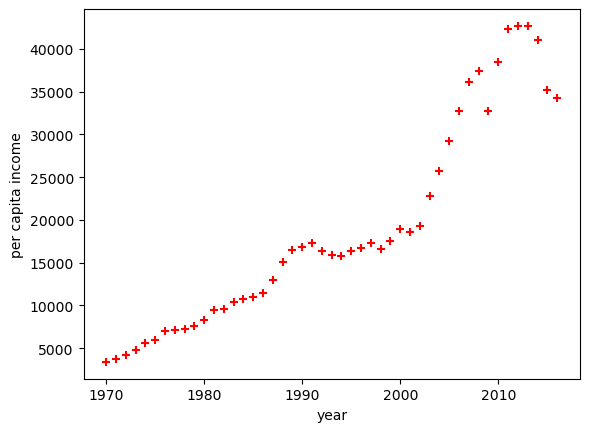

In [30]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income')
plt.scatter(df.year, df["per capita income (US$)"], color='red',marker='+')

In [20]:
# Create new_df to be the 2D array for the Linear Regression
new_df = df.drop("per capita income (US$)", axis="columns")
new_df.head(3)

,year
0,1970
1,1971
2,1972


In [23]:
income = df["per capita income (US$)"]
income.head(3)

0    3399.299037
1    3768.297935
2    4251.175484
Name: per capita income (US$), dtype: float64

In [31]:
# Create a Linear Regression object
reg = linear_model.LinearRegression()

#Fit the data (training the Linear Regression model using the available data points)
# The first argument has to be a 2D array so we can supply the data frame
reg.fit(new_df, df["per capita income (US$)"])

LinearRegression()

In [32]:
# Predict the income in 2050
reg.predict([[2050]])

c:\Users\filip\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\pandas\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66142.6463511])

In [ ]:
# Coefficiente value (m)
reg.coef_

array([828.46507522])

In [35]:
# b (Y intercept)
reg.intercept_

-1632210.7578554575

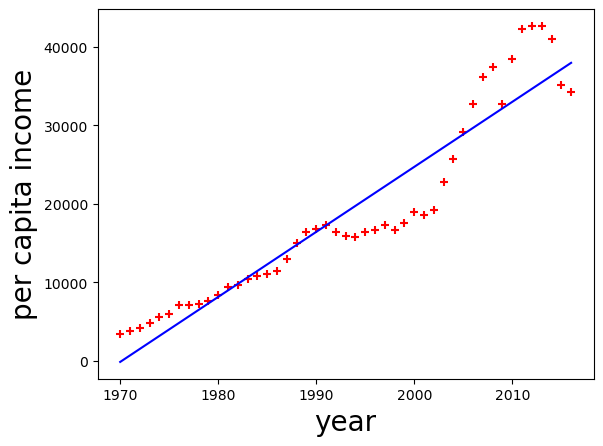

In [37]:
# How the linear regression line looks like
%matplotlib inline
plt.xlabel('year', fontsize=20)
plt.ylabel('per capita income', fontsize=20)
plt.scatter(df.year, df["per capita income (US$)"], color='red',marker='+')
plt.plot(df.year, reg.predict(df[["year"]]), color="blue")

In [47]:
# Creating object to read the file canada_per_capita_income_edit.csv
df_years = pd.read_csv("canada_per_capita_income_edit.csv")
new_df_years = df_years.drop("per capita income (US$)", axis="columns")
new_df_years.head(3)

,year
0,2020
1,2030
2,2040


In [48]:
# Predict the income
p = reg.predict(new_df_years)
p

array([41288.69409442, 49573.34484664, 57857.99559887, 66142.6463511 ])

In [50]:
# Create a new column in the dataframe
new_df_years["per capita income pred (US$)"] = p
new_df_years

,year,per capita income pred (US$)
0,2020,41288.694094
1,2030,49573.344847
2,2040,57857.995599
3,2050,66142.646351


In [51]:
# Export to csv
new_df_years.to_csv("prediction_income.csv", index=False)

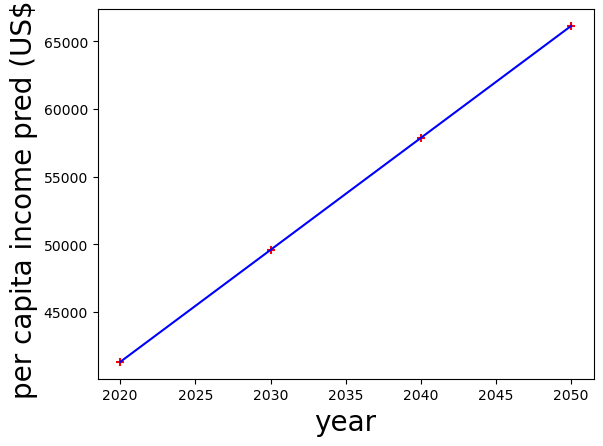

In [52]:
%matplotlib inline
plt.xlabel('year', fontsize=20)
plt.ylabel("per capita income pred (US$)", fontsize=20)
plt.scatter(new_df_years.year, new_df_years["per capita income pred (US$)"], color='red',marker='+')
plt.plot(new_df_years.year, reg.predict(new_df_years[["year"]]), color="blue")